In [70]:
# ssh carnd@ip -L 4567:localhost:4567

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc as misc
import cv2 as cv
%matplotlib inline

# Fix error with TF and Keras
# import tensorflow as tf
# tf.python.control_flow_ops = tf

In [72]:
# df = pd.read_csv('./data/driving_log.csv', 
#                  names=['centre_image', 'left_image', 'right_image', 'steering_angle', 'throttle', 'break', 'speed'])
df = pd.read_csv('./data/driving_log.csv')
print(df.shape)
df.head(2)

(8036, 7)


,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.14829
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.87963


In [73]:
# D:\SDCND\beta-simulator-windows\recording\IMG\center_2017_02_14_22_05_18_509.jpg

# df = df.replace(to_replace="D:\\\\SDCND\\\\beta-simulator-windows", value='.', regex=True).replace(to_replace='\\\\', value='/', regex=True)
df = df.replace(to_replace="( )?IMG", value='./data/IMG', regex=True)
df.head(2)

,center,left,right,steering,throttle,brake,speed
0,./data/IMG/center_2016_12_01_13_30_48_287.jpg,./data/IMG/left_2016_12_01_13_30_48_287.jpg,./data/IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.14829
1,./data/IMG/center_2016_12_01_13_30_48_404.jpg,./data/IMG/left_2016_12_01_13_30_48_404.jpg,./data/IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.87963


./data/IMG/center_2016_12_01_13_31_14_295.jpg
(160, 320, 3)


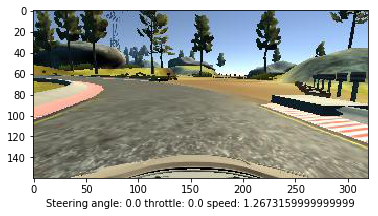

In [74]:
def show_image(index):
    print(df['center'][index])
    image = mpimg.imread(df['center'][index])
    print(image.shape)
    plt.imshow(image)
    plt.xlabel("Steering angle: {} throttle: {} speed: {}".format(df['steering'][index], df['throttle'][index], df['speed'][index]))

show_image(15)

(array([  4.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   2.10000000e+01,   8.00000000e+01,
          1.80000000e+02,   2.14000000e+02,   8.11000000e+02,
          4.95600000e+03,   6.93000000e+02,   7.12000000e+02,
          1.76000000e+02,   1.28000000e+02,   3.80000000e+01,
          6.00000000e+00,   5.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00]),
 array([-0.9426954 , -0.84556063, -0.74842586, -0.65129109, -0.55415632,
        -0.45702155, -0.35988678, -0.26275201, -0.16561724, -0.06848247,
         0.0286523 ,  0.12578707,  0.22292184,  0.32005661,  0.41719138,
         0.51432615,  0.61146092,  0.70859569,  0.80573046,  0.90286523,  1.        ]),
 <a list of 20 Patch objects>)

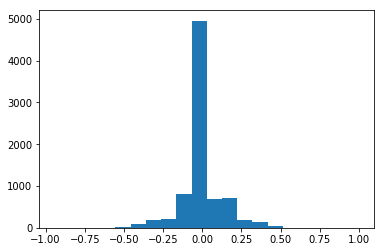

In [75]:
plt.hist(df['steering'], bins=20)

In [76]:
# plt.hist(df['throttle'])

# df2 = df[(df['steering'] != 0)]
df2 = df[(df['steering'] <= -0.01) | (df['steering'] >= 0.01)].reset_index(drop=True)

print(df2.shape)
print(df2['steering'][100])
df = df2



(3584, 7)
0.1670138


(array([   4.,    2.,    3.,    4.,   21.,   80.,  180.,  214.,  811.,
         504.,  693.,  712.,  176.,  128.,   38.,    6.,    5.,    1.,
           0.,    2.]),
 array([-0.9426954 , -0.84556063, -0.74842586, -0.65129109, -0.55415632,
        -0.45702155, -0.35988678, -0.26275201, -0.16561724, -0.06848247,
         0.0286523 ,  0.12578707,  0.22292184,  0.32005661,  0.41719138,
         0.51432615,  0.61146092,  0.70859569,  0.80573046,  0.90286523,  1.        ]),
 <a list of 20 Patch objects>)

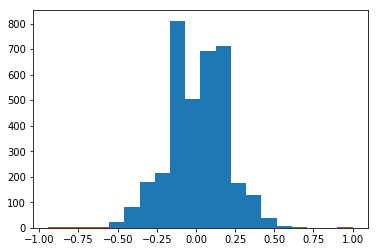

In [77]:
plt.hist(df['steering'], bins=20)

(3584, 80, 80, 3)
(3584, 1)
[[ 0.1574452]
 [ 0.1765823]
 [ 0.1765823]
 [-0.0787459]
 [-0.0787459]]


(array([   4.,    2.,    3.,    4.,   21.,   80.,  180.,  214.,  811.,
         504.,  693.,  712.,  176.,  128.,   38.,    6.,    5.,    1.,
           0.,    2.]),
 array([-0.9426954 , -0.84556063, -0.74842586, -0.65129109, -0.55415632,
        -0.45702155, -0.35988678, -0.26275201, -0.16561724, -0.06848247,
         0.0286523 ,  0.12578707,  0.22292184,  0.32005661,  0.41719138,
         0.51432615,  0.61146092,  0.70859569,  0.80573046,  0.90286523,  1.        ]),
 <a list of 20 Patch objects>)

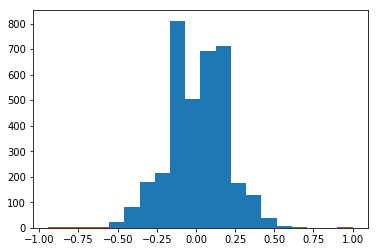

In [78]:
# get images and labels

# camera = center, left, right
def get_images(df, camera='center'):
    result = []
    for path in df[camera]:
        img = mpimg.imread(path)
#         img = misc.imresize(img, (80,160))
        img = cv.resize(img, (80, 80), interpolation=cv.INTER_AREA)
        result.append(img)
    return np.stack(result)

x = get_images(df)
print(x.shape)

y = df.as_matrix(columns=['steering'])
print(y.shape)
print(y[10:15])
plt.hist(y, bins=20)

In [79]:
# use the left and right cameras
steering_adjustment = 0.25
x_left = get_images(df, camera='left')
y_left = y + steering_adjustment

x_right = get_images(df, camera='right')
y_right = y - steering_adjustment

print(x_left.shape)

x = np.append(x, x_left, axis=0)
y = np.append(y, y_left, axis=0)
x = np.append(x, x_right, axis=0)
y = np.append(y, y_right, axis=0)

(3584, 80, 80, 3)


In [80]:
# generate more data
# df_flip_data = df[(df['steering'] <= -0.1) | (df['steering'] >= 0.1)].reset_index(drop=True)
df_flip_data = df[(df['steering'] <= -0.01) | (df['steering'] >= 0.01)].reset_index(drop=True)
# df_flip_data = df[(df['steering'] <= -0.1)].reset_index(drop=True)
print(df_flip_data.shape)
x_flip = get_images(df_flip_data)
y_flip = df_flip_data.as_matrix(columns=['steering'])

y_flip = -y_flip
# print(x_flip.shape)
x_flip = [np.fliplr(a) for a in x_flip]
# plt.imshow(x_flip[100])

x = np.append(x, x_flip, axis=0)
y = np.append(y, y_flip, axis=0)
print(x.shape)
print(y.shape)


(3584, 7)
(14336, 80, 80, 3)
(14336, 1)


(array([    4.,     0.,     2.,     3.,     6.,     4.,     5.,    20.,
           61.,    55.,   152.,   224.,   214.,   593.,   819.,   483.,
         1341.,   959.,  1867.,   667.,  1355.,  1298.,  1377.,   467.,
          713.,   560.,   630.,   133.,   130.,   115.,    20.,    31.,
            8.,     7.,     8.,     3.,     0.,     0.,     0.,     2.]),
 array([-1.1926954 , -1.13162801, -1.07056063, -1.00949324, -0.94842586,
        -0.88735847, -0.82629109, -0.7652237 , -0.70415632, -0.64308893,
        -0.58202155, -0.52095416, -0.45988678, -0.39881939, -0.33775201,
        -0.27668462, -0.21561724, -0.15454985, -0.09348247, -0.03241509,
         0.0286523 ,  0.08971968,  0.15078707,  0.21185446,  0.27292184,
         0.33398923,  0.39505661,  0.456124  ,  0.51719138,  0.57825876,
         0.63932615,  0.70039353,  0.76146092,  0.82252831,  0.88359569,
         0.94466307,  1.00573046,  1.06679784,  1.12786523,  1.18893262,
         1.25      ]),
 <a list of 40 Patch objects>)

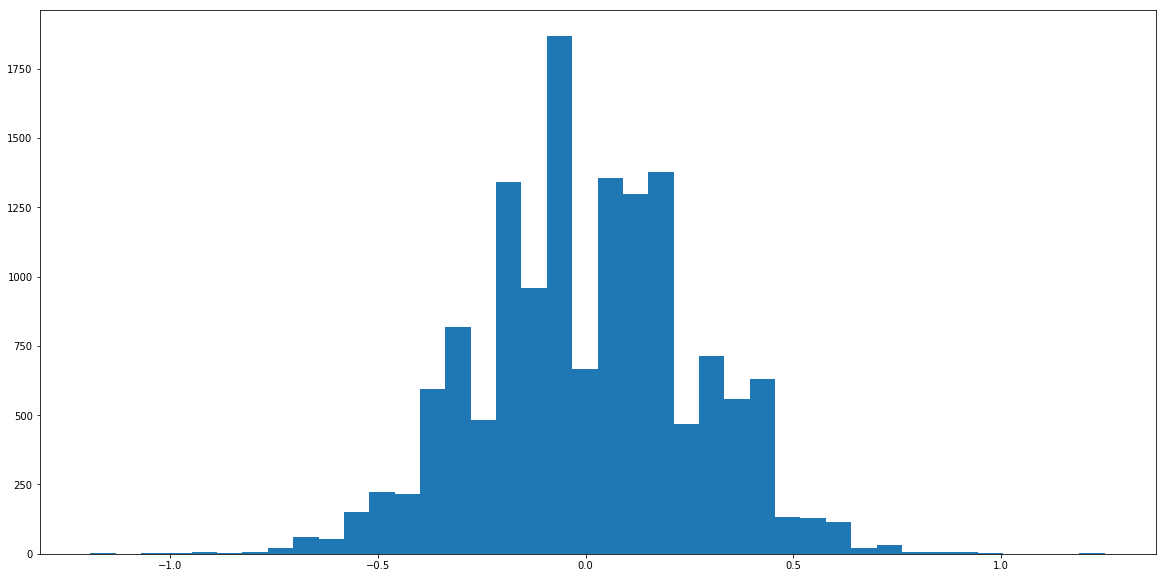

In [81]:
plt.figure(figsize=(20,10))
plt.hist(y, bins=40)

In [82]:
# TODO: Build a model
import keras
from keras.models import Sequential, Model
from keras.layers import Cropping2D, Lambda, Input
from keras.layers.core import Activation, Dense, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.backend import tf as ktf

def traffic_sign_model():
    model = Sequential()
    model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
    model.add(Cropping2D(cropping=((50,20), (0,0))))
    model.add(Convolution2D(32, 1, 1, border_mode='same'))
    model.add(Convolution2D(32, 3, 3, border_mode='same'))
    model.add(Convolution2D(32, 3, 3, border_mode='same'))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2,2), border_mode='same'))
    model.add(Convolution2D(64, 3, 3, border_mode='same'))
    model.add(Convolution2D(64, 3, 3, border_mode='same'))
    model.add(Convolution2D(64, 3, 3, border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2,2), border_mode='same'))
    model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.compile('adam', 'mse')
    return model

def VGG():
    # 3 channel images of arbitrary shape
#     inp = Input(shape=(None, None, 3))
#     out = Lambda(lambda image: keras.backend.tf.image.resize_images(image, (40, 80)))(inp)
    inp = Input(shape=(80, 80, 3))
    preproc = Lambda(lambda x: (x / 255.0) - 0.5)(inp)
#     preproc = Cropping2D(cropping=((50,20), (10,10)))(preproc)
    preproc = Convolution2D(3, 1, 1, border_mode='same')(preproc)
    modelvgg = VGG16(include_top=False, weights=None, input_tensor=preproc, input_shape=None)
#     modelvgg = VGG16(include_top=False, weights=None, input_tensor=None, input_shape=(80,80,3))
#     model.summary()
    layer = Flatten(name='flatten')(modelvgg.layers[-1].output)
    layer = Dense(2048, activation='relu', name='dense1')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(2048, activation='relu', name='dense2')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(100, activation='relu', name='dense3')(layer)
    layer = Dropout(0.5)(layer)
    prediction = Dense(1)(layer)
    model = Model(modelvgg.input, prediction)
    adam = Adam(lr=0.0001)
    model.compile(adam, 'mse')
    return model

model = VGG()
model.summary()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 80, 80, 3)     0                                            
____________________________________________________________________________________________________
lambda_2 (Lambda)                (None, 80, 80, 3)     0           input_2[0][0]                    
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 80, 80, 3)     12          lambda_2[0][0]                   
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 80, 80, 64)    1792        convolution2d_2[0][0]            
___________________________________________________________________________________________

In [83]:
history = model.fit(x, y, batch_size=128, nb_epoch=10, validation_split=0.2)

Train on 11468 samples, validate on 2868 samples
Epoch 1/10
11468/11468 [==============================] - 98s - loss: 0.0762 - val_loss: 0.0381

In [84]:
model.save('./model.h5')


In [1]:
from keras.models import load_model
model = load_model('./model.h5')

Using TensorFlow backend.


index: 7756  actual:  [-0.1403974]  prediction: [[-0.09584019]]  diff: [[ 0.04455721]]
index: 2681  actual:  [-0.0787459]  prediction: [[-0.09407575]]  diff: [[-0.01532985]]
index: 13003  actual:  [ 0.03127411]  prediction: [[ 0.16744246]]  diff: [[ 0.13616835]]
index: 13709  actual:  [ 0.06925154]  prediction: [[ 0.0511985]]  diff: [[-0.01805304]]
index: 13642  actual:  [ 0.04076847]  prediction: [[ 0.2150711]]  diff: [[ 0.17430263]]
index: 10998  actual:  [-0.4157956]  prediction: [[-0.1958494]]  diff: [[ 0.2199462]]
index: 3161  actual:  [ 0.0904655]  prediction: [[ 0.11536498]]  diff: [[ 0.02489948]]
index: 1966  actual:  [ 0.05219137]  prediction: [[-0.02528552]]  diff: [[-0.07747689]]
index: 3642  actual:  [ 0.3404655]  prediction: [[ 0.3195194]]  diff: [[-0.0209461]]


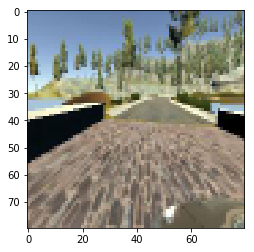

In [85]:
import random
for i in range(1, 10):
    test_index=random.randint(0, len(x))
#     print(test_index)
    test_image = x[test_index]
#     print(y[test_index])
    prediction = model.predict(test_image[None, :, :, :], batch_size=1)
    print("index:", test_index, " actual: ", y[test_index], " prediction:", prediction, " diff:", prediction - y[test_index])


plt.imshow(test_image)

In [ ]:
# from IPython.display import SVG

# from keras.utils.visualize_util import model_to_dot
# from keras.utils.visualize_util import plot
# plot(model, to_file='./examples/model.png')

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [86]:
result = model.evaluate(x, y, batch_size=128)

print(model.metrics_names)
print(result)

14336/14336 [==============================] - 33s     

In [ ]:
# # TODO: Load test data
# with open('test.p', 'rb') as f:
#     data = pickle.load(f)

# # TODO: Load the feature data to the variable X_train
# X_test = data['features']

# # TODO: Load the label data to the variable y_train
# y_test = data['labels']
    
# # TODO: Preprocess data & one-hot encode the labels
# X_test_normalized = normalize_grayscale(X_test)
# y_test_one_hot = label_binarizer.fit_transform(y_test)

# # TODO: Evaluate model on test data
# result = model.evaluate(X_test_normalized, y_test_one_hot, batch_size=128)

# print(model.metrics_names)
# print(result)